In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU,Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

In [2]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOGL', 'NVDA', 'META']
data = yf.download(tickers, period='5y')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed


In [3]:
data

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2020-03-09,64.593880,90.030502,60.569931,168.854980,144.170258,6.114038,40.533333
2020-03-10,69.246033,94.591003,63.528206,177.511932,154.029221,6.503639,43.021999
2020-03-11,66.841072,91.042999,60.326309,169.592178,147.051346,6.139697,42.282001
2020-03-12,60.240211,83.830498,55.376755,153.882172,133.105255,5.388395,37.369999
2020-03-13,67.457497,89.250000,60.494205,169.632004,152.028687,5.999450,36.441334
...,...,...,...,...,...,...,...
2025-03-03,238.029999,205.020004,167.009995,655.049988,388.489990,114.059998,284.649994
2025-03-04,235.929993,203.800003,170.919998,640.000000,388.609985,115.989998,272.040009
2025-03-05,235.740005,208.360001,173.020004,656.469971,401.019989,117.300003,279.100006


In [4]:
seq_length = 60

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [5]:
predictions_df = pd.DataFrame(columns=['Stock', 'ACTUAL_Prediction', 'LSTM_Prediction'])

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0440
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0012
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
Epoc

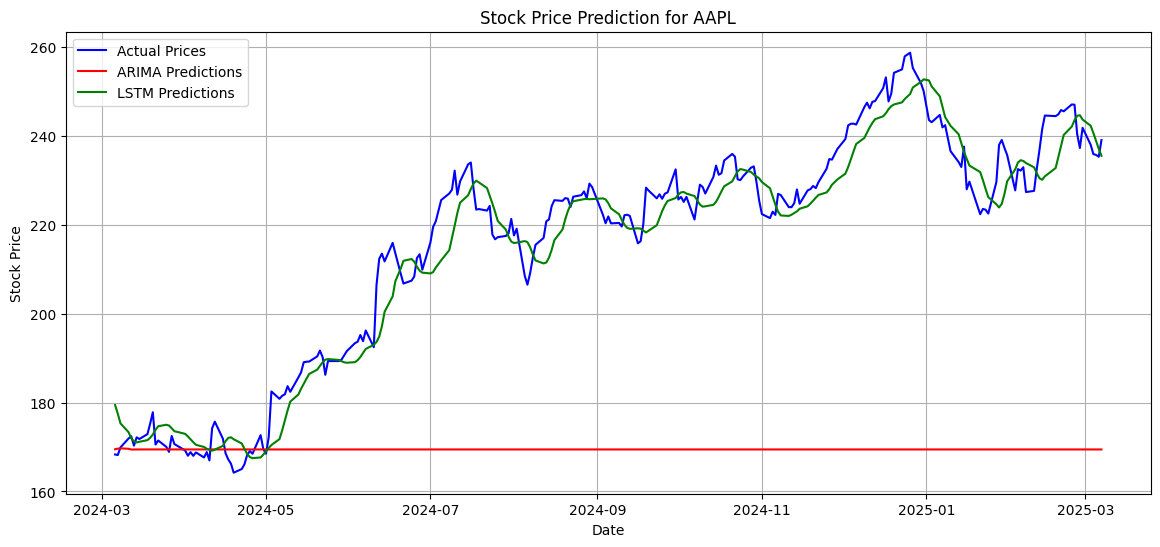

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0433
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0017
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0015
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010
Epoc

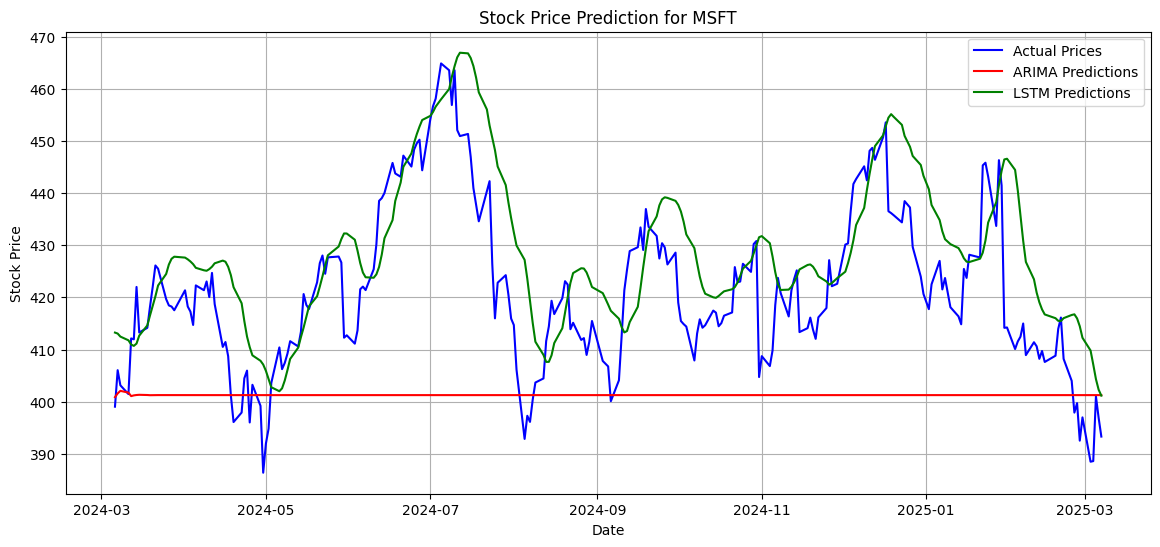

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0476
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0030
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0022
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0020
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017
Epoc

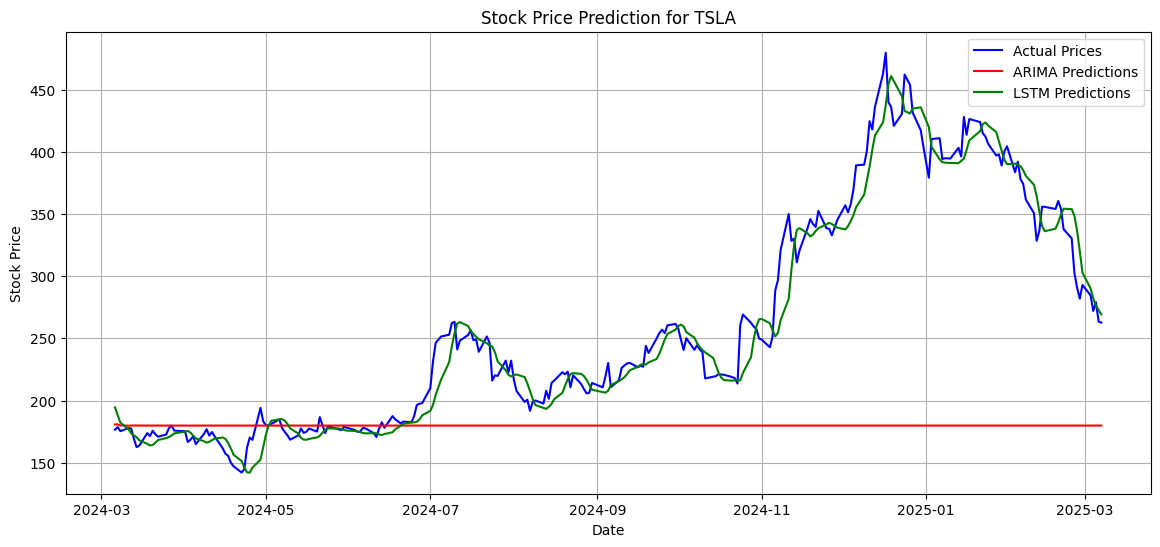

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0378
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0026
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0026
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0023
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0016
Epoc

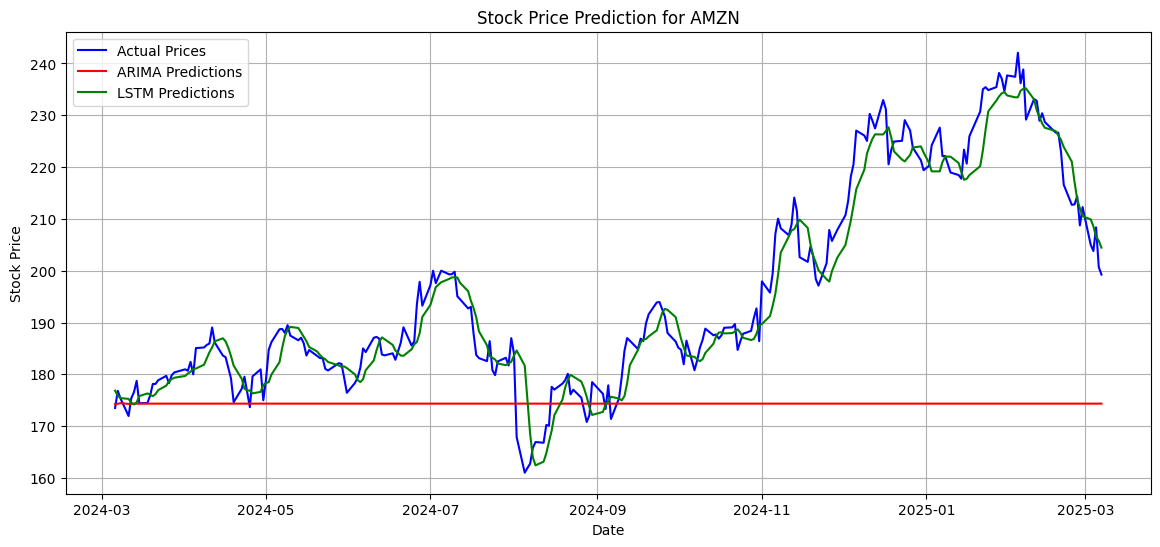

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0425
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012
Epoch 15/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Epoc

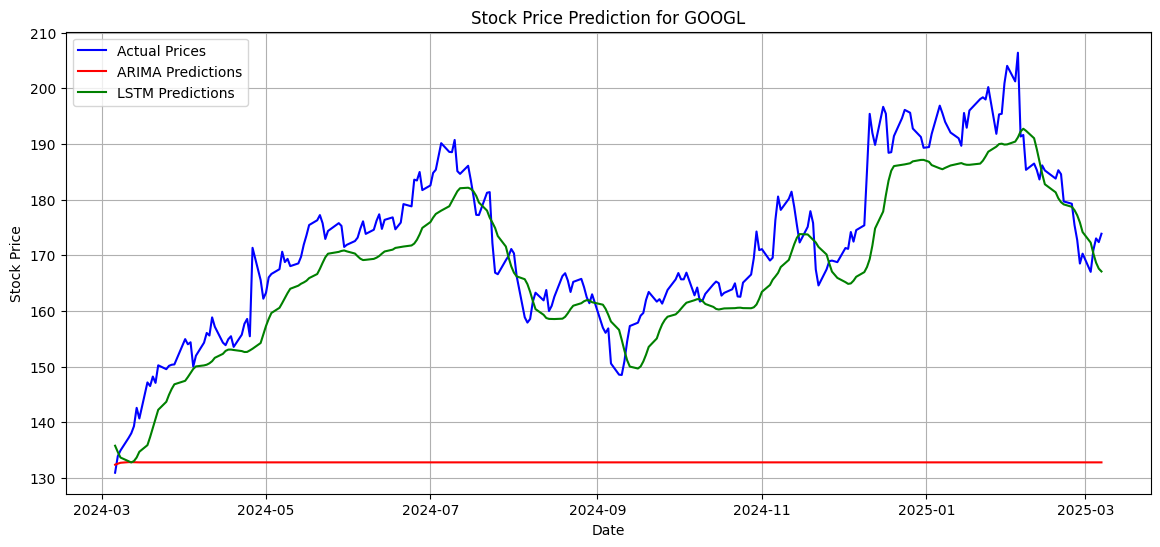

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0071
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.2464e-04
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.5889e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6515e-04
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2784e-04
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9554e-04
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4549e-04
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6658e-04
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6915e-04
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5325e-04
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9714e-04
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1707e-04
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1166e-04
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2098e-04
Epoch 15/30
30/30 ━

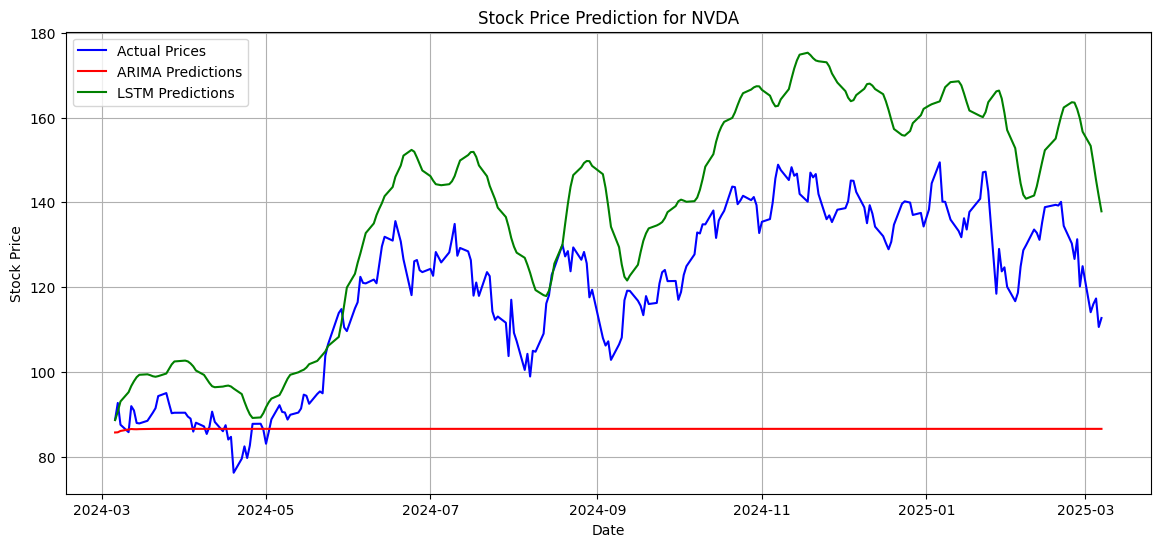

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.2341e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.1311e-04
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.4132e-04
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.4909e-04
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.8570e-04
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.5221e-04
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.1586e-04
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.5503e-04
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.4921e-04
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.4916e-04
Epoch 13/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.2437e-04
Epoch 14/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.6319e-04
Epoch 15/30
30/30 ━━━━━

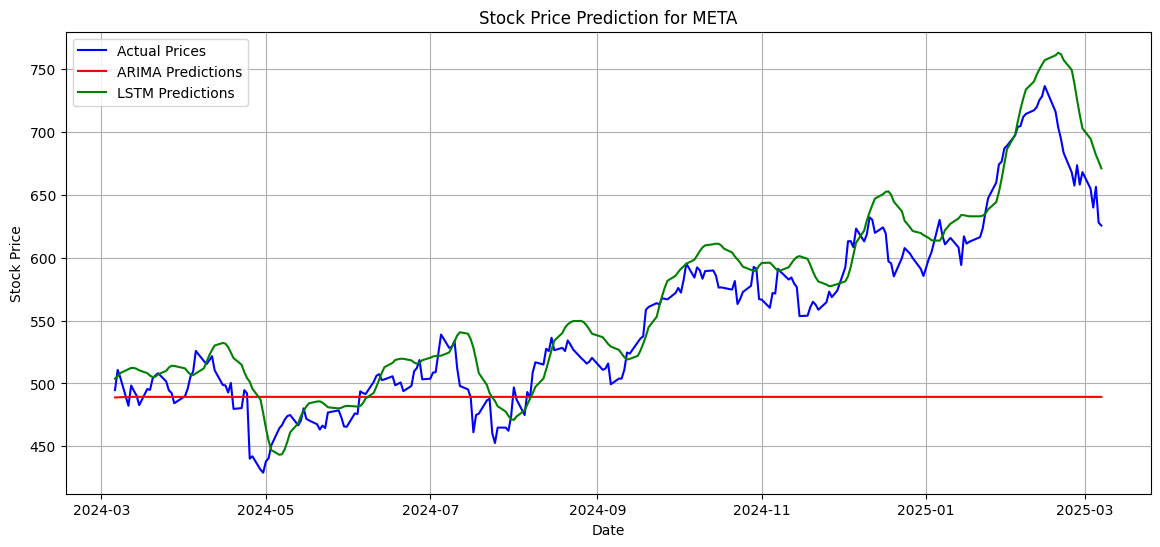

In [6]:
for stock in tickers:
    prices = data[stock].values

    train_size = int(len(prices) * 0.8)
    train, test = prices[:train_size], prices[train_size:]

    arima_model = ARIMA(train, order=(5,1,0))
    arima_fit = arima_model.fit()
    arima_pred = arima_fit.forecast(steps=len(test))

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

    X, y = create_sequences(scaled_prices, seq_length)
    X_train, X_test = X[:train_size-seq_length], X[train_size-seq_length:]
    y_train, y_test = y[:train_size-seq_length], y[train_size-seq_length:]

    model = Sequential([
        Input(shape=(seq_length, 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(100, return_sequences=True),
        Dropout(0.2),
        GRU(100, return_sequences=True),
        Dropout(0.2),
        GRU(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

    y_pred_lstm = model.predict(X_test)
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm)


    last_sequence = scaled_prices[-seq_length:]
    last_sequence = last_sequence.reshape((1, seq_length, 1))
    next_price = model.predict(last_sequence)
    next_price = scaler.inverse_transform(next_price)


    predictions_df = pd.concat([predictions_df, pd.DataFrame({
        'Stock': [stock],
        'LSTM_Prediction': [next_price]
    })], ignore_index=True)

    plt.figure(figsize=(14,6))
    plt.plot(data.index[train_size:], test, label='Actual Prices', color='blue')
    plt.plot(data.index[train_size:], arima_pred, label='ARIMA Predictions', color='red')
    plt.plot(data.index[train_size:], y_pred_lstm, label='LSTM Predictions', color='green')
    plt.legend()
    plt.title(f'Stock Price Prediction for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid()
    plt.show()

In [8]:
predictions_df.drop('ACTUAL_Prediction', axis=1, inplace=True)

In [9]:
predictions_df.to_csv('predictions.csv', index=False)

In [11]:
predictions_df

,Stock,LSTM_Prediction
0,AAPL,[[234.54677]]
1,MSFT,[[400.55826]]
2,TSLA,[[265.84024]]
3,AMZN,[[202.46056]]
4,GOOGL,[[167.07114]]
5,NVDA,[[134.75455]]
6,META,[[664.83105]]
